In [15]:
# utilities
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from  nltk.stem import SnowballStemmer
# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor


# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [16]:
#Load Dataset
df = pd.read_csv('maroko_worldcup.csv')
df

,id,date,text
0,1601953292271161345,2022-12-11 14:53:22+00:00,@elonmusk Marocco will win this world cup
1,1601948137358299137,2022-12-11 14:32:53+00:00,Best final for the World Cup 2022? Croatia and...
2,1601943320640585730,2022-12-11 14:13:44+00:00,I might lean marocco to win the world cup at t...
3,1601941656215117825,2022-12-11 14:07:08+00:00,🔵 Le Maroc est deuxième pays musulman après la...
4,1601936788809027584,2022-12-11 13:47:47+00:00,He destroyed even our dream to watch #CR7𓃵 pla...
...,...,...,...
626,1599829992602755074,2022-12-05 18:16:08+00:00,What if Marocco wins the World Cup? Against al...
627,1599795758286647297,2022-12-05 16:00:06+00:00,Japan - Marocco World Cup Final written in the...
628,1599793309987524608,2022-12-05 15:50:22+00:00,"Spain vs Marocco Line Up FIFA World Cup 2022, ..."
629,1599738406342230016,2022-12-05 12:12:12+00:00,Wild take but World Cup semifinal will be Arge...


# Labeling Dataset

In [17]:
#With Sentiment Intensity Analyzer
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

#With TextBlob
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [18]:
sentiments_using_SIA = df['text'].apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,text
pos,563
neg,68


In [19]:
sentiments_using_textblob = df['text'].apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,text
pos,577
neg,54


We'll use Sentiment Insensity Analyzer (Vader), cause it gives us more negatif sentiments than TextBlob

In [20]:
df['target'] = sentiments_using_SIA
df.sample(20)

,id,date,text,target
512,1600373187518164992,2022-12-07 06:14:36+00:00,E chiudiamo con le notizie sportive che trovan...,pos
478,1600584671569403904,2022-12-07 20:14:57+00:00,@StokeLoudProud If it was a playoff match or i...,neg
288,1601623605082980352,2022-12-10 17:03:18+00:00,I hope Marocco win the world cup! Writing hist...,pos
414,1601486302301429761,2022-12-10 07:57:43+00:00,so france and marocco needs to win tonight i w...,pos
466,1600811228594458625,2022-12-08 11:15:13+00:00,@dindabung @Aprilmyoracle Marocco's Players Pl...,pos
400,1601566715011559424,2022-12-10 13:17:15+00:00,"7 Live Streaming Free, Prediksi Line Up Marocc...",pos
301,1601623226102140930,2022-12-10 17:01:48+00:00,marocco winning the world cup btw,pos
6,1601929636103028739,2022-12-11 13:19:22+00:00,@nocontextfooty Marocco is the Italy of this W...,pos
629,1599738406342230016,2022-12-05 12:12:12+00:00,Wild take but World Cup semifinal will be Arge...,pos
568,1600187272627822592,2022-12-06 17:55:50+00:00,haizz!!!🙄🙄🙄\nlại dự đoán đúng rồi 🫢 🫢😤😤😤\nCHÚC...,pos


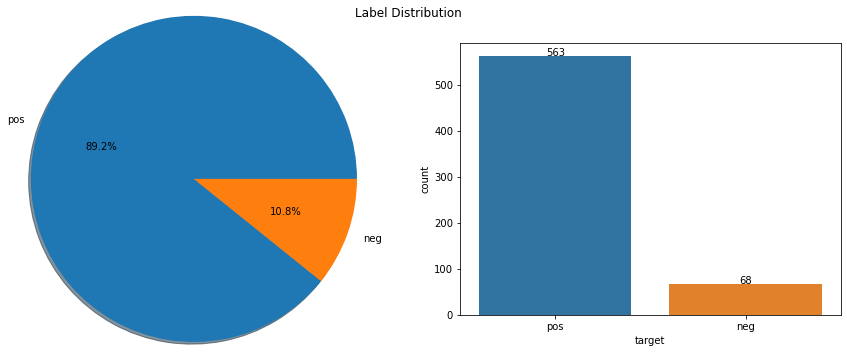

In [21]:
#Visualizing Sentiment feature - Target feature
plt.figure(figsize=(15,5))
plt.suptitle("Label Distribution")

#plot pie chart
plt.subplot(1,2,1)
label = df['target'].value_counts().index
label_count = df['target'].value_counts().values
plt.pie(data=df, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1.5)

#plot countplot
plt.subplot(1,2,2)
ax = sns.countplot(x='target', data=df, order=label)
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

# Data Preprocessing

In [22]:
lm = nltk.WordNetLemmatizer()
stemmer = SnowballStemmer("english")
stop_words = stopwords.words("english")

def dataPreprocessing(tweet, method="stem"):
    if type(tweet) == np.float64:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) 
    temp = re.sub("@[\s][A-Za-z0-9_]+","", temp) 
    temp = re.sub("@[A-Za-z0-9_]+","", temp) 
    temp = re.sub("#[A-Za-z0-9_]+","", temp) 
    temp = re.sub(r'http\S+', '', temp) 
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = EMOJI_PATTERN.sub(r'', temp)
    temp =  NUMBERING_PATTERN.sub('', temp)
    temp = re.sub(r"(.)1{2,}",  r'11', temp)

    tokens = []
    for token in temp.split():
      if token not in stop_words:
          if method == "stem":
              tokens.append(stemmer.stem(token)) # Stemming
          elif method == "lemma":
              tokens.append(lm.lemmatize(token)) # Lemmatize
          else:
              tokens.append(token)
    return " ".join(tokens)

In [23]:
 #utils
import re

    
EMOJI_PATTERN = re.compile(
    "["
    u"U0001F600-U0001F64F"  # emoticons
    u"U0001F300-U0001F5FF"  # symbols & pictographs
    u"U0001F680-U0001F6FF"  # transport & map symbols
    u"U0001F1E0-U0001F1FF"  # flags (iOS)
    u"U00002702-U000027B0"
    u"U000024C2-U0001F251"
    "]+", flags=re.UNICODE
)
NUMBERING_PATTERN = re.compile('d+(?:st|[nr]d|th)')

In [24]:
df['clean_text'] = df['text'].apply(lambda x: dataPreprocessing(x, method="lemma"))

In [25]:
df

,id,date,text,target,clean_text
0,1601953292271161345,2022-12-11 14:53:22+00:00,@elonmusk Marocco will win this world cup,pos,marocco win world cup
1,1601948137358299137,2022-12-11 14:32:53+00:00,Best final for the World Cup 2022? Croatia and...,pos,best final world cup croatia marocco melhor fi...
2,1601943320640585730,2022-12-11 14:13:44+00:00,I might lean marocco to win the world cup at t...,pos,might lean marocco win world cup point argenti...
3,1601941656215117825,2022-12-11 14:07:08+00:00,🔵 Le Maroc est deuxième pays musulman après la...,pos,le maroc est deuxi pay musulman apr la turquie...
4,1601936788809027584,2022-12-11 13:47:47+00:00,He destroyed even our dream to watch #CR7𓃵 pla...,pos,destroyed even dream watch play last world cup...
...,...,...,...,...,...
626,1599829992602755074,2022-12-05 18:16:08+00:00,What if Marocco wins the World Cup? Against al...,pos,marocco win world cup odds possible considerin...
627,1599795758286647297,2022-12-05 16:00:06+00:00,Japan - Marocco World Cup Final written in the...,pos,japan marocco world cup final written star
628,1599793309987524608,2022-12-05 15:50:22+00:00,"Spain vs Marocco Line Up FIFA World Cup 2022, ...",pos,spain v marocco line fifa world cup spanyol si...
629,1599738406342230016,2022-12-05 12:12:12+00:00,Wild take but World Cup semifinal will be Arge...,pos,wild take world cup semifinal argentina v japa...


In [26]:
df['clean_text']

0                                  marocco win world cup
1      best final world cup croatia marocco melhor fi...
2      might lean marocco win world cup point argenti...
3      le maroc est deuxi pay musulman apr la turquie...
4      destroyed even dream watch play last world cup...
                             ...                        
626    marocco win world cup odds possible considerin...
627           japan marocco world cup final written star
628    spain v marocco line fifa world cup spanyol si...
629    wild take world cup semifinal argentina v japa...
630    world cup currently four team last giant game ...
Name: clean_text, Length: 631, dtype: object

In [27]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['target'].apply(lambda x: 0 if x=='neg' else 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape

(504,)

# Feature Extraction and TFIDF

In [28]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=200000)
vectorizer.fit(X_train)
print('No. of feature_words: ', len(vectorizer.get_feature_names()))

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

No. of feature_words:  10139


C:\Users\Nab\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
X_train.()

# Modeling

In [51]:
# Importing Models
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB


In [53]:
SVC=LinearSVC()
NB=MultinomialNB()
DecTree = DecisionTreeClassifier()
xgboost =  XGBClassifier()


In [45]:
def predict(model):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_predict) * 100 ))
    confusion_matrix_model = confusion_matrix(y_test, y_predict)
    print(classification_report(y_test, y_predict))
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

In [ ]:
y

Accuracy: 94.49%
              precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       0.95      0.99      0.97       119

    accuracy                           0.94       127
   macro avg       0.81      0.62      0.67       127
weighted avg       0.93      0.94      0.93       127



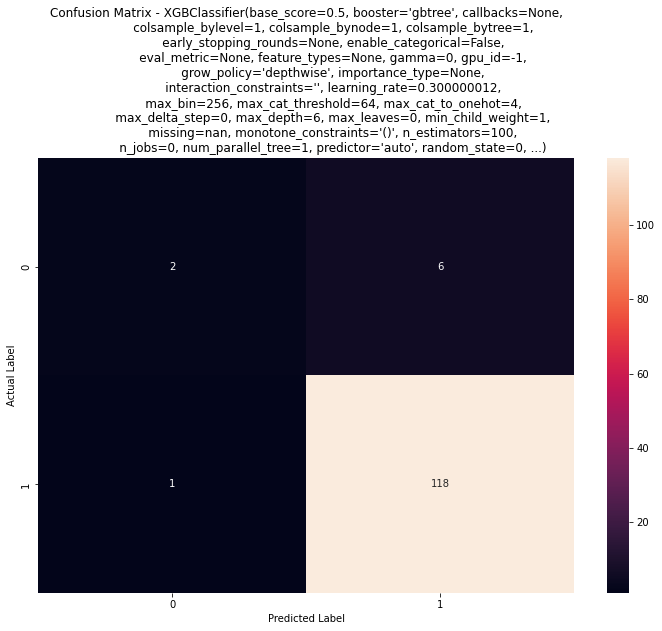

In [54]:
predict(xgboost)

Accuracy: 92.91%
              precision    recall  f1-score   support

           0       0.33      0.12      0.18         8
           1       0.94      0.98      0.96       119

    accuracy                           0.93       127
   macro avg       0.64      0.55      0.57       127
weighted avg       0.91      0.93      0.91       127



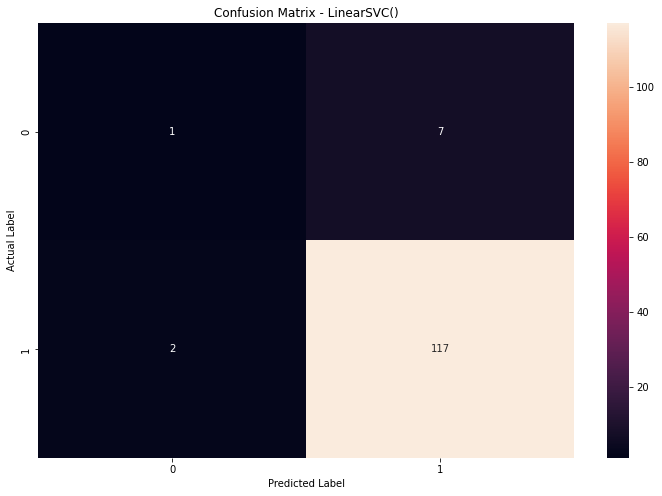

In [47]:
predict(SVC)

Accuracy: 83.46%
              precision    recall  f1-score   support

           0       0.16      0.38      0.22         8
           1       0.95      0.87      0.91       119

    accuracy                           0.83       127
   macro avg       0.56      0.62      0.56       127
weighted avg       0.90      0.83      0.86       127



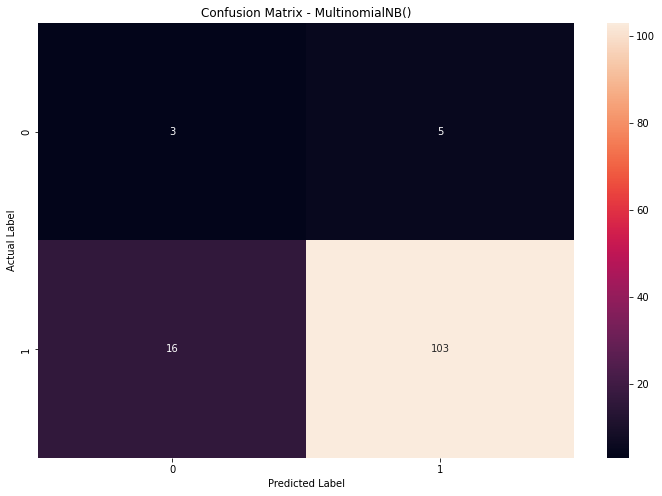

In [48]:
predict(NB)

Accuracy: 89.76%
              precision    recall  f1-score   support

           0       0.27      0.38      0.32         8
           1       0.96      0.93      0.94       119

    accuracy                           0.90       127
   macro avg       0.61      0.65      0.63       127
weighted avg       0.91      0.90      0.91       127



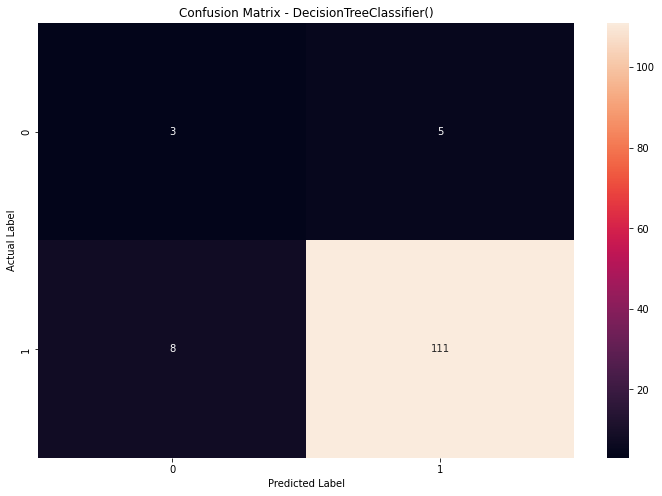

In [49]:
predict(DecTree)

In [56]:
# Tuning XGBoost Classifier
from sklearn.model_selection import RandomizedSearchCV

grid3 = {'n_estimators': [100,150,200,250,300,350,400,450,500],
              'learning_rate': [0.01, 0.5,0.2, 1.0],
              'subsample': [0.3,0.5, 0.6,0.8,1.0],
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': [0.2,0.5, 0.4,0.8,1.0],
              'min_child_weight': [1, 2, 3, 4]}
xgb = RandomizedSearchCV(XGBClassifier(),
                             param_distributions = grid3,
                             cv = 10,
                             n_iter = 10, n_jobs = 1, verbose=1,
                             scoring = 'recall')
xgb.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=1,
                   param_distributions={'colsample_bytree': [0.2, 0.5, 0.4, 0.8,
                                                             1.0],
                                        'learning_rate': [0.01, 0.5, 0.2, 1.0],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500],
                                        'subsample': [0.3, 0.5, 0.6, 0.8, 1.0]},
                   scoring='recall', verbose=1)

In [57]:
xgb.best_params_

{'subsample': 0.6,
 'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.5,
 'colsample_bytree': 1.0}

Accuracy: 92.13%
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         8
           1       0.95      0.97      0.96       119

    accuracy                           0.92       127
   macro avg       0.64      0.61      0.62       127
weighted avg       0.91      0.92      0.92       127



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

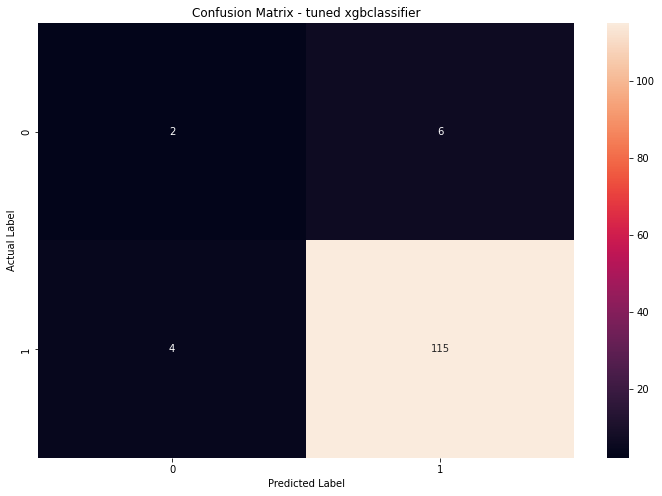

In [58]:
tuned_xgb = XGBClassifier(**xgb.best_params_)
tuned_xgb.fit(X_train,y_train)
y_pred = tuned_xgb.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print(classification_report(y_test, y_pred))
confusion_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - tuned xgbclassifier')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])